In [42]:
%load_ext ipydex.displaytools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE

The ipydex.displaytools extension is already loaded. To reload it, use:
  %reload_ext ipydex.displaytools


In [2]:
# Source: https://cloudstor.aarnet.edu.au/plus/index.php/s/2DhnLGDdEECo4ys?path=%2FUNSW-NB15%20-%20CSV%20Files%2Fa%20part%20of%20training%20and%20testing%20set
data = pd.read_csv('./UNSW_NB15_training-set.csv')
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


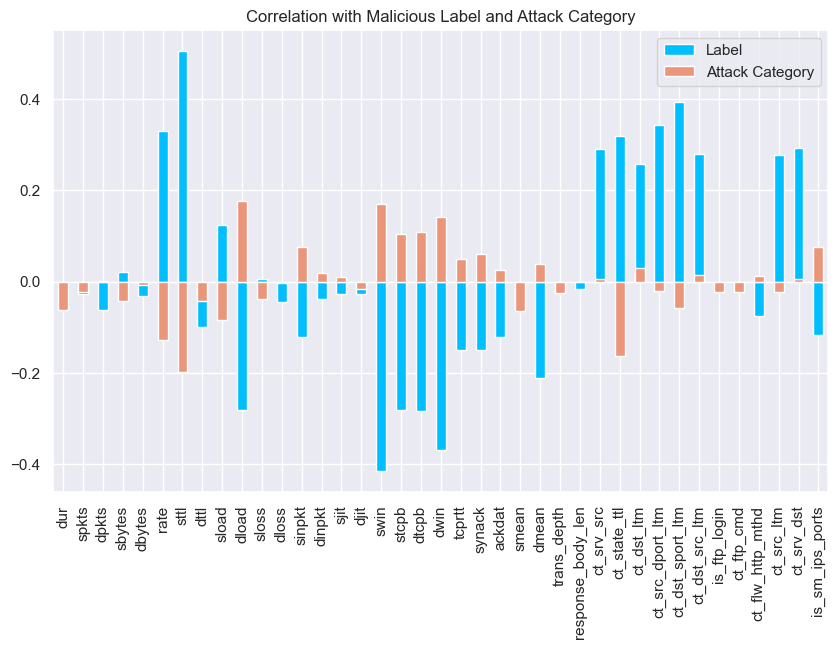

In [39]:
df = data.drop(['id'], axis=1)

attack_le = LabelEncoder()
df['attack_cat'] = attack_le.fit_transform(df['attack_cat'])

df.drop(['label','attack_cat'], axis=1).corrwith(df['label']).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Malicious Label", color="deepskyblue")
df.drop(['label','attack_cat'], axis=1).corrwith(df['attack_cat']).plot(kind='bar', grid=True, figsize=(10, 6), 
        title="Correlation with Malicious Label and Attack Category", color="darksalmon").legend(['Label','Attack Category'],loc='best')



<AxesSubplot:>

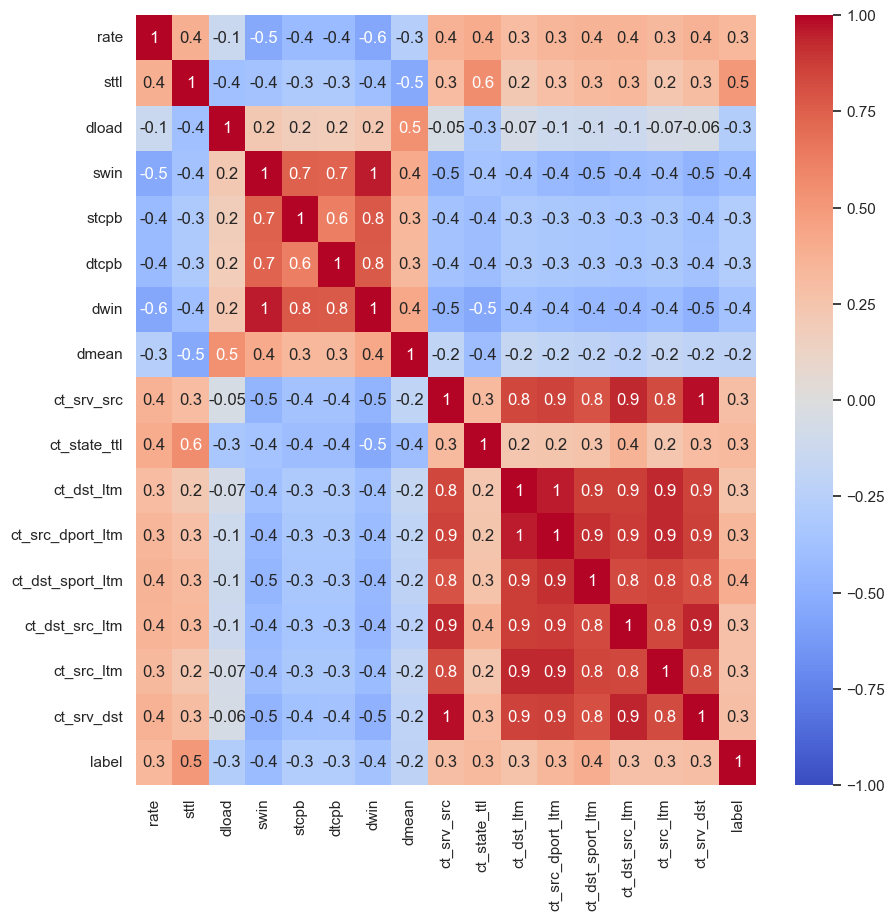

In [23]:
df_label = df.drop(
    [k for k,v in  (df.drop(['label','attack_cat'], axis=1).corrwith(df['label']).abs().sort_values(ascending=True) < 0.2).items()  if v],
    axis=1)
df_label = df_label.drop(['attack_cat','state', 'proto', 'service'], axis=1)

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df_label.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

In [15]:
df_label_lesscorr = df_label[['rate','sttl','dload','swin','dmean','ct_state_ttl','ct_dst_src_ltm','label']]
df_label_lesscorr.head()

,rate,sttl,dload,swin,dmean,ct_state_ttl,ct_dst_src_ltm,label
0,90909.0902,254,0.0,0,0,2,2,0
1,125000.0003,254,0.0,0,0,2,2,0
2,200000.0051,254,0.0,0,0,2,3,0
3,166666.6608,254,0.0,0,0,2,3,0
4,100000.0025,254,0.0,0,0,2,3,0


0.5999878544968725


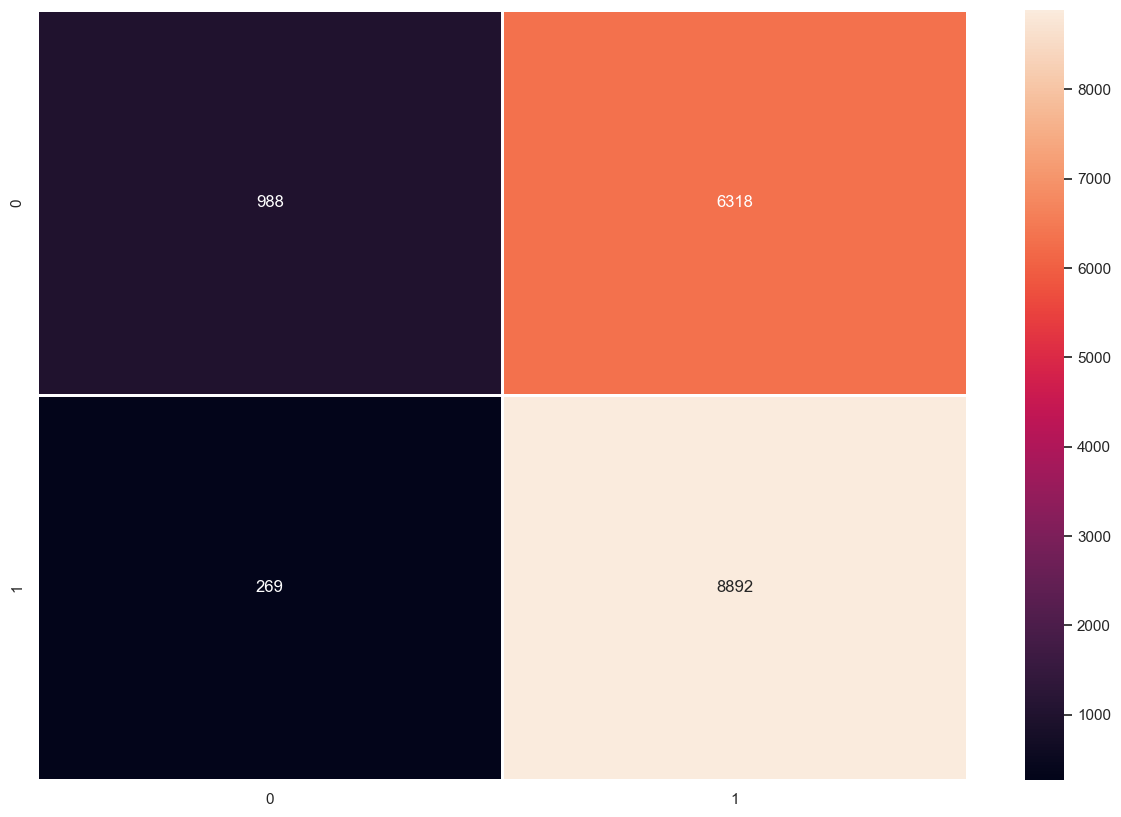

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    df_label_lesscorr.drop(['label'], axis=1).to_numpy(), df_label_lesscorr['label'], test_size=0.2)

## 0.6935689560940062 without normalization
norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

nb_label = GaussianNB().fit(X_train,y_train)
y_pred = nb_label.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')
print(accuracy_score(y_test, y_pred))

0.634845448472703


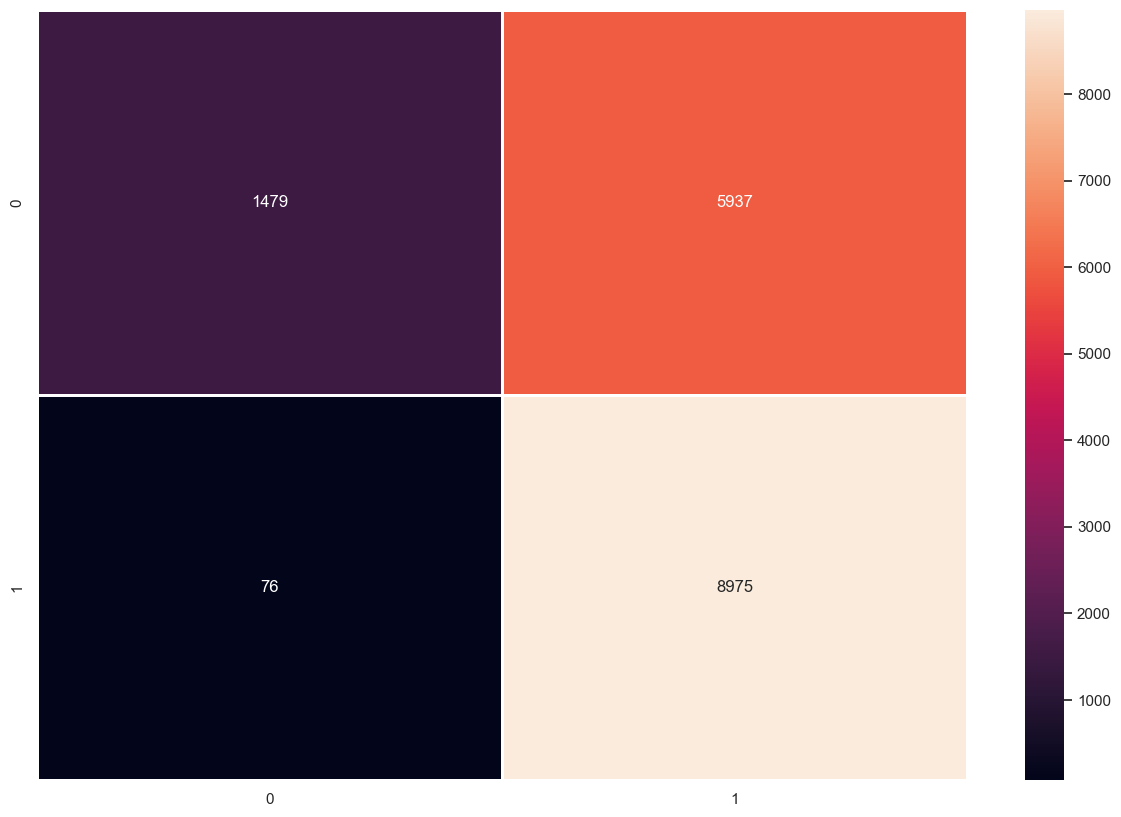

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    df_label.drop(['label'], axis=1).to_numpy(), df_label['label'], test_size=0.2)

## 0.6848849213578673 without normalization
norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

nb_label = GaussianNB().fit(X_train,y_train)
y_pred = nb_label.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')
print(accuracy_score(y_test, y_pred))

<AxesSubplot:>

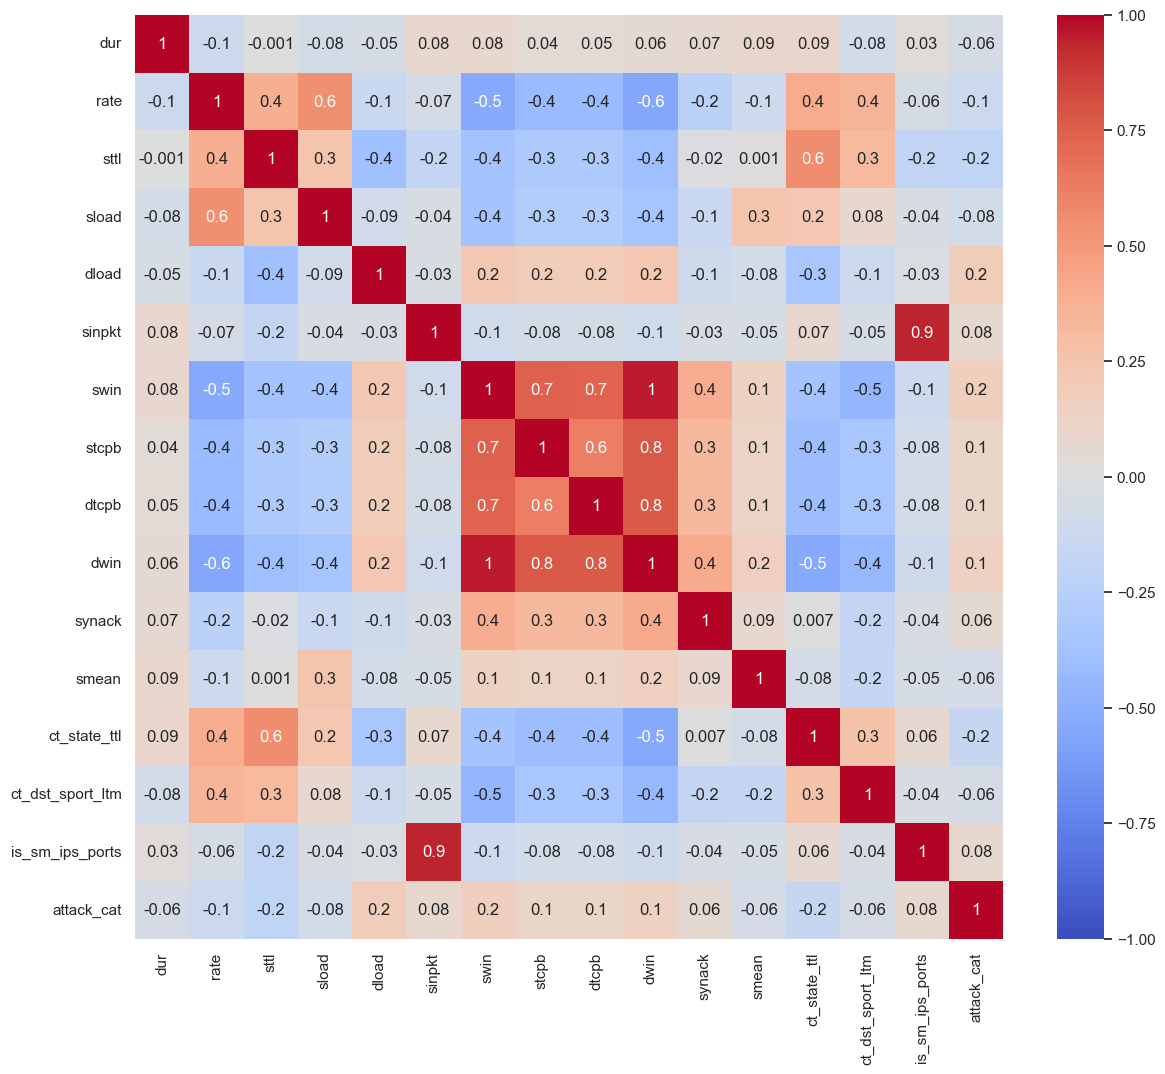

In [26]:
df_cat = df.drop(
    [k for k,v in  (df.drop(['label','attack_cat'], axis=1).corrwith(df['attack_cat']).abs().sort_values(ascending=True) < 0.05).items()  if v],
    axis=1)
df_cat = df_cat.drop(['label','state', 'proto', 'service'], axis=1)

sns.set(rc = {'figure.figsize':(14,12)})
sns.heatmap(df_cat.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

In [ ]:
df_cat_lesscorr = df_cat[['rate','sttl','dload','swin','dmean','ct_state_ttl','ct_dst_src_ltm','attack_cat']]
df_cat_lesscorr.head()

0.08265014878241331


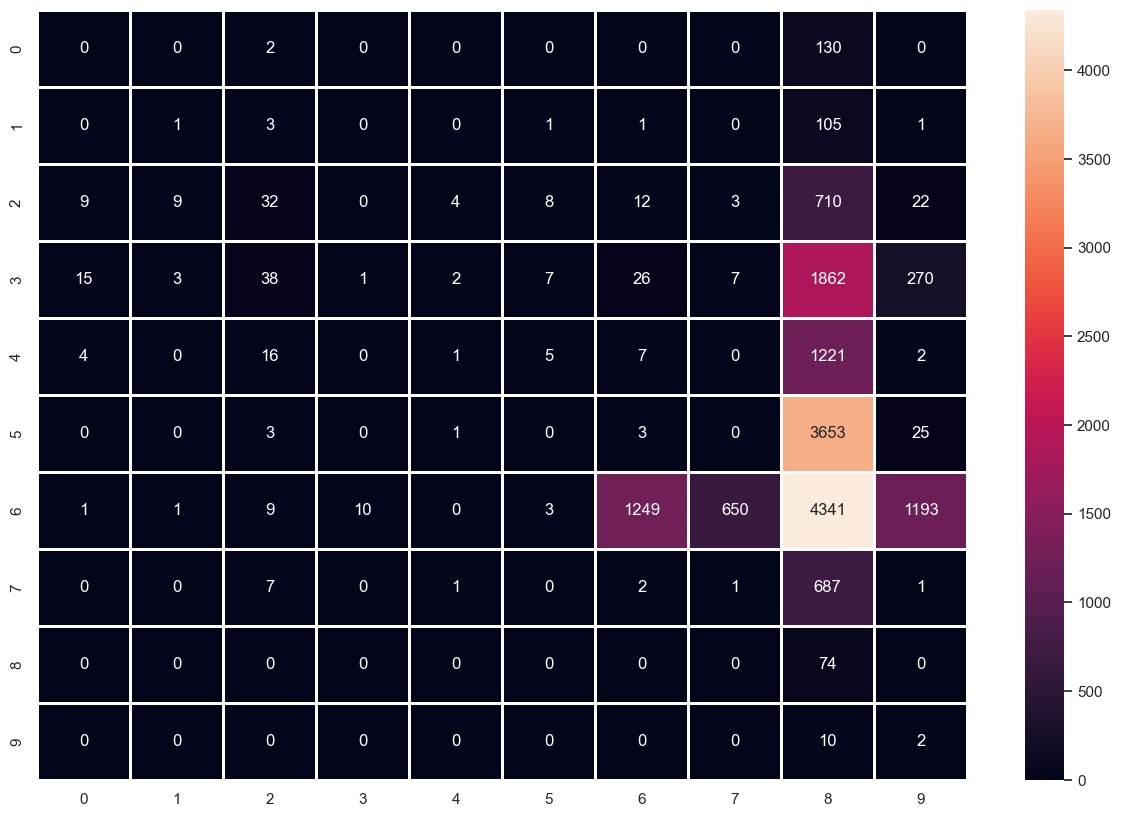

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    df_cat.drop(['attack_cat'], axis=1).to_numpy(), df_cat['attack_cat'], test_size=0.2)

## 0.426914434930467 without normalization or smote
## 0.17738507317665633 without normalization with smote
## 0.08362178903261068 with normalization and without smote
## 0.06449262160685007 with normalization and with smote

norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

#X_train, y_train =  BorderlineSMOTE().fit_resample(X_train,y_train)

nb_cat = GaussianNB().fit(X_train,y_train)
y_pred = nb_cat.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')
print(accuracy_score(y_test, y_pred))

0.6171737414222385


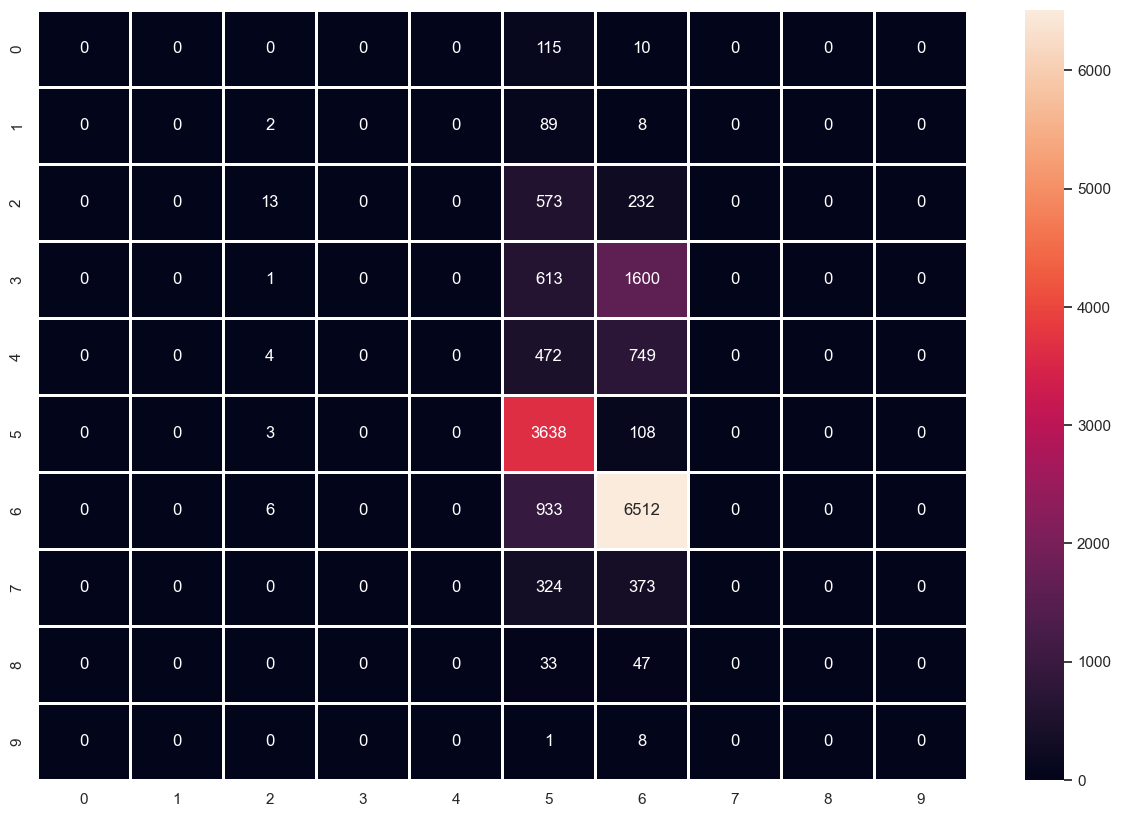

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    df_cat.drop(['attack_cat'], axis=1).to_numpy(), df_cat['attack_cat'], test_size=0.2)

## 0.6163235562033157 without normalization or smote
## 0.1592275460010931 without normalization with smote
## 0.6169308313596891 with normalization and without smote
## 0.10445132689621668 with normalization and with smote

norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

#X_train, y_train =  BorderlineSMOTE().fit_resample(X_train,y_train)

nb_cat = ComplementNB().fit(X_train,y_train)
y_pred = nb_cat.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')
print(accuracy_score(y_test, y_pred))

In [61]:
pd.DataFrame([
attack_le.inverse_transform( df['attack_cat'].value_counts().index ).T,
df['attack_cat'].value_counts().values.T ])

,0,1,2,3,4,5,6,7,8,9
0,Normal,Generic,Exploits,Fuzzers,DoS,Reconnaissance,Analysis,Backdoor,Shellcode,Worms
1,37000,18871,11132,6062,4089,3496,677,583,378,44


In [66]:
np.linalg.eig(df_label.cov())
df_label.cov().describe()

,rate,sttl,dload,swin,stcpb,dtcpb,dwin,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01
mean,-1.037074e+13,-5.059757e+09,7.028293e+13,1.543021e+10,1.844299e+17,1.829851e+17,1.606782e+10,1.310720e+10,-6.664371e+08,-7.145550e+07,-4.231156e+08,-4.402610e+08,-3.298983e+08,-6.488578e+08,-4.545917e+08,-6.813398e+08,-2.291019e+07
std,2.927084e+13,1.426681e+10,1.973554e+14,4.354769e+10,5.364686e+17,5.314670e+17,4.534697e+10,3.694461e+10,1.881157e+09,2.015705e+08,1.194246e+09,1.242482e+09,9.310245e+08,1.831125e+09,1.283113e+09,1.923197e+09,6.461491e+07
min,-8.858113e+13,-4.316200e+10,-4.923633e+10,-1.010888e+07,-8.858113e+13,-8.769426e+13,-1.047999e+07,-9.425417e+06,-5.694247e+09,-6.116429e+08,-3.617768e+09,-3.757559e+09,-2.815673e+09,-5.542711e+09,-3.885270e+09,-5.818513e+09,-1.947100e+08
25%,-1.010888e+07,-5.155710e+03,-1.674855e+06,-6.157691e+02,-5.542711e+09,-5.484882e+09,-6.545115e+02,-5.477203e+02,-6.521723e+02,-7.281747e+01,-4.133777e+02,-4.443498e+02,-3.335211e+02,-6.545115e+02,-4.501022e+02,-6.696157e+02,-2.573916e+01
50%,3.219769e+05,1.885900e+02,-1.348460e+06,-3.459080e+02,-2.815673e+09,-2.791244e+09,-3.335211e+02,-3.058665e+02,5.255901e+01,1.664579e+00,4.343165e+01,4.524220e+01,3.499179e+01,5.611300e+01,4.282377e+01,5.335060e+01,1.080348e+00
75%,6.060101e+05,3.433553e+02,7.116485e+07,1.558947e+04,1.318064e+11,1.304493e+11,1.558947e+04,1.335553e+04,1.182164e+02,3.630017e+00,7.862670e+01,7.959524e+01,5.255901e+01,1.182164e+02,7.793434e+01,1.194688e+02,1.589867e+00
max,2.208801e+10,5.856078e+06,6.019995e+14,1.318064e+11,1.934491e+18,1.909913e+18,1.372004e+11,1.123640e+11,6.060101e+05,6.335815e+04,3.890768e+05,4.308801e+05,3.219769e+05,6.088882e+05,4.159394e+05,6.129094e+05,2.429526e+04
